  <tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Dimension Reduction Techniques (PCA)
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and others. The prices can be predicted more accurately if the number of predictors is less. Several dimension reduction techniques are being applied to decrease this number of predictors.

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'datetime' is used to perform date and time operations
import datetime as dt

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA


<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# read the data
raw_data = pd.read_csv('/naman/pgads/houseprice.csv')
# print the first five rows of the data
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Change index column

The first column in the data contains a unique numbering for each observation. We can make this column as an index column

In [87]:
# the parameter 'index_col' will change the index to the specified column
raw_data = pd.read_csv('houseprice.csv', index_col=0)

# head() to display top five rows
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [88]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that not all the variables are numeric. Many variables, including the target variable are categorical variables<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
# get the shape
print(raw_data.shape)

(1460, 80)


**We see the dataframe has 80 columns and 1460 observations**

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that the data type of the variables like 'MSSubclass', 'OverallQual', 'OverallCond' has 'int64' data type<br><br>
                        But by data definition these are 'categorical' variables. So we will convert the data type of these variables  to object
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
# Use .astype() to change the data type
# use 'for' loop to change the data type of a large number of columns
for feature in ['MSSubClass','OverallQual','OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

**Let us now recheck the data type once again after we have done the conversion in the immediate last step**

In [91]:
# recheck of the data type
raw_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

<a id='Feature_Engineering'></a>
## 3.2 Feature Engineering




<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Features like 'YearBuilt' and 'YearRemodAdd' represent the initial construction year and year of remodeling respectively. Create new columns namely, 'Buiding_age' and 'Remodel_age' that provide the information about the age of building and years since remodeled
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# 'now().year' gives the current year
# store the year as 'current_year'
current_year = int(dt.datetime.now().year)          

In [93]:
# creating 2 new columns as 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [94]:
# add the above columns in our dataframe
raw_data['Buiding_age'] = Buiding_age
raw_data['Remodel_age'] = Remodel_age

In [95]:
# printing the head of the data to check whether the new columns are added or not
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Buiding_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,20,20
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,47,47
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,22,21
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,108,53
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,23,23


In [96]:
raw_data.shape

(1460, 82)

**We see the dataframe has 82 columns and 1460 observations**

<a id='Missing_Data_Treatment'></a>
## 3.3. Missing Data Treatment
We can not perform the matrix operations in PCA without removing null values in the data 

**First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them**

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The variables 'PoolQC', 'MiscFeature', 'Alley', etc. have a higher percentage of missing values. So maybe removing these variables will be a good option<br><br>

But, there is a catch here!<br><br>

According to the data definition, for the variable 'Alley', 'NA' is the type of alley access. But, Python treats this 'NA' as a null value. <br>

Check for such false missing values and replace them with their actual meaning</b>     </font>
            </div>
        </td>
    </tr>
</table>

**Replace the 'NA' values with their actual meaning as per the data definition**

In [98]:
# replace NA values in 'Alley' with a valid value, 'No alley access' 
raw_data['Alley'].fillna('No alley access' , inplace = True)

In [99]:
# 'MasVnrType' have 0.55% NA values, replace it with 'None'
raw_data['MasVnrType'].fillna('None' , inplace = True)

In [100]:
# use 'for' loop for filling NA values with 'No Basement' in the following 5 columns 
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    raw_data[col].fillna('No Basement' , inplace = True)

In [101]:
# replace NA values in 'Electrical' with its mode 'SBrkr'
raw_data['Electrical'].fillna('SBrkr' , inplace = True)

In [102]:
# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
raw_data['FireplaceQu'].fillna('No Fireplace' , inplace = True)

In [103]:
# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    raw_data[col].fillna('No Garage' , inplace = True)

In [104]:
# replace NA values in 'PoolQC' with a valid value, 'No Pool'
raw_data['PoolQC'].fillna('No Pool' , inplace = True)

In [105]:
# replace NA values in 'Fence' with a valid value, 'No Fence'
raw_data['Fence'].fillna('No Fence' , inplace = True)

In [106]:
# replace NA values in 'MiscFeature' with a valid value, 'None'
raw_data['MiscFeature'].fillna('None' , inplace = True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For the numerical variables, replace the missing values by their respective mean, median or mode as per the requirement </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
# 'LotFrontage' has 17.74% of missing values, Replace these with its median value
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median() , inplace = True)

In [108]:
# 'MasVnrArea' have 0.55% missing values, replace it with its mode 0
raw_data['MasVnrArea'].fillna(0 , inplace = True)

In [109]:
# replace missing values in 'GarageYrBlt' with its mode 0
raw_data['GarageYrBlt'].fillna(0 , inplace = True)

**After replacing the null values, check for the null values for the final time**

In [110]:
# any().sum() gives the total number of columns with null values
raw_data.isnull().any().sum()  

0

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above output shows that there are no missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="CPCS"> </a>
## 4. Compute Principal Components (from scratch)

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Perform PCA with the following steps:<br><br>
                        1. Filter the numerical variables <br>
                        2. Scale the data to get variables on the same scale
<br>
                        3. Compute covariance matrix<br>
                        4. Calculate eigenvalues and eigenvectors of the covariance matrix<br>
                        5. Decide the number of principal components<br>
                        6. Obtain principal components
                </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Prepare'></a>
### 4.1 Prepare the Data 

Separate the numerical variables, as we will perform PCA on the numerical data


In [111]:
X = raw_data.drop('SalePrice', axis = 1)
y = raw_data['SalePrice']

In [112]:
# select the numerical variables and store it as 'df_numeric_features'
df_numeric_features = raw_data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop target variable from 'df_numeric_features' 
# use 'drop' function to drop the entire column
df_num = df_numeric_features.drop('SalePrice',axis=1)       

# head() to display top five rows
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Buiding_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,20,20
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,47,47
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,22,21
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,108,53
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,23,23


<a id='Scale'></a>
### 4.2 Scale the Data
The variables like 'YearBuilt', 'MasVnrArea', 'OpenPorchSF', etc. have a different value range. We scale the variable to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others


In [113]:
# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
X = StandardScaler().fit_transform(df_num)

print(X)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [114]:
# 'shape' function gives the total number of rows and columns in the scaled data
print(df_num_std.shape)

(1460, 35)


**Use these 35 standardized variables to find the principal components**

<a id='cov_mat'></a>
### 4.3 Covariance Matrix

PCA aims to minimize the distortions and to summarize the essential information in the data. These distortions (noise, redundancy, etc.) reflect in the off-diagonal values of the covariance matrix

In [115]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The covariance matrix is a square matrix consists of covariance between 35 variables </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='eigen'></a>
### 4.4 Compute Eigenvalues and Eigenvectors 


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Eigenvalues: The diagonal values of the diagonalized covariance matrix are called eigenvalues of the covariance matrix. Large eigenvalues correspond to large variances<br><br>
                        
Eigenvectors: The eigenvectors give directions of the new rotated axes 
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [116]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 7.02177050e+00  3.31255010e+00  2.62014342e+00  1.89709198e+00
  1.49734667e+00  9.99263899e-02  1.36214989e-01  1.95108720e-01
  2.13950778e-01  3.01103966e-01  3.54408421e-01  4.01613912e-01
  1.27323863e+00  5.45571325e-01  5.57495391e-01  6.14455332e-01
  6.53106933e-01  6.65210391e-01  1.17628474e+00  7.70438353e-01
  7.98982584e-01  8.42159693e-01  8.54295919e-01  1.12605403e+00
  1.11386919e+00  9.17108768e-01  1.06812304e+00  1.04387620e+00
  9.58644771e-01  1.01349985e+00  9.80344037e-01 -1.11554854e-15
 -2.73808169e-15  8.60986589e-16  1.96242865e-16] 

Eigenvectors: 
 
 [[-1.57341483e-01 -8.14685975e-02  2.25870623e-01 ... -1.38670921e-16
   2.96553916e-17  2.86951806e-16]
 [-1.05975763e-01 -4.68261206e-02  2.65177563e-01 ...  6.00549752e-17
  -2.48259059e-16 -1.99683116e-16]
 [-2.55985052e-01  2.51938290e-01 -2.26447644e-01 ... -2.38258637e-01
   6.50366523e-01  2.09716377e-02]
 ...
 [ 1.05407256e-02  3.81464928e-02  5.52812401e-03 ...  1.01257691e-16
   

<a id='components'></a>
### 4.5 Decide Number of Principal Components

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are two ways to decide the number of principal components<br><br>
1) eigenvalue-one criteria: Select the components that have eigenvalues greater than 1<br>
2) Choose the number of components before the elbow point of the scree plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [117]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True)
print(eig_val)

[7.021770499413528, 3.3125501041720895, 2.620143420109834, 1.897091977915826, 1.4973466747555364, 1.2732386321496965, 1.1762847353254324, 1.1260540287787368, 1.1138691902660673, 1.0681230423123145, 1.0438762011995228, 1.013499854773815, 0.9803440369826897, 0.9586447711070964, 0.9171087678623848, 0.8542959189393439, 0.8421596927472516, 0.7989825842753154, 0.7704383525332125, 0.6652103910693308, 0.653106932825134, 0.6144553317267841, 0.5574953911006569, 0.5455713249726823, 0.40161391207370806, 0.3544084205249485, 0.3011039663361523, 0.21395077836552928, 0.1951087197992371, 0.13621498924662495, 0.09992638992418831, 8.609865887810383e-16, 1.9624286544306682e-16, -1.1155485372786823e-15, -2.738081691207433e-15]


**Now let us use the scree plot to decide the number of components**

#### Scree plot: Plot the eigenvalues and choose the components before elbow point 

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observed that, after the elbow point, principal components do not contribute much to the variance in the data. That means, we can choose eigenvectors corresponding to first five eigenvalues as principal components
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Find the Explained Variance Ratio

In [118]:
tot = sum(eig_val)
tot

35.02398903358466

In [119]:
var_exp = [(i/tot) * 100 for i in sorted(eig_val, reverse = True)]

cum_sum_exp_var_ratio = np.cumsum(var_exp)
cum_sum_exp_var_ratio

array([ 20.04846019,  29.50640658,  36.98740315,  42.40395344,
        46.67915657,  50.31448957,  53.67300117,  56.88809477,
        60.06839838,  63.11808825,  66.09854887,  68.99227937,
        71.79134385,  74.5284529 ,  77.14696893,  79.5861426 ,
        81.99066509,  84.2719089 ,  86.47165363,  88.37095297,
        90.23569468,  91.99007889,  93.58183187,  95.13953943,
        96.28622182,  97.29812374,  98.15783155,  98.76870079,
        99.32577246,  99.71469158, 100.        , 100.        ,
       100.        , 100.        , 100.        ])

### Plot the Elbow Graph for Optimal Number of Dimensions

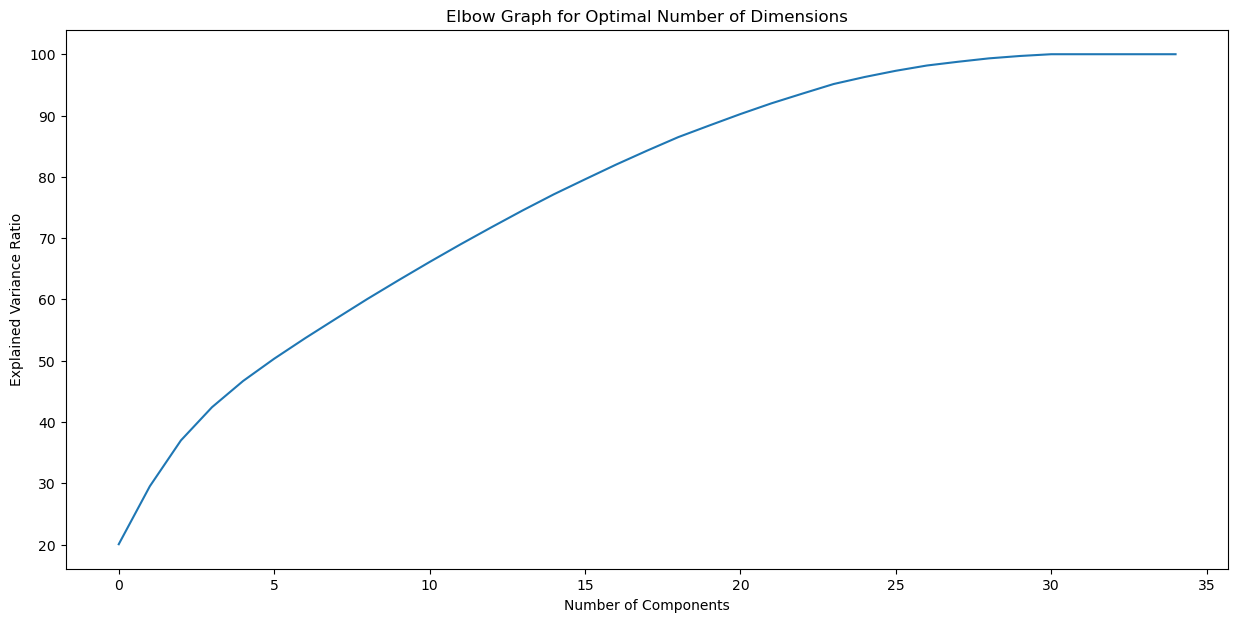

In [120]:
plt.figure(figsize=(15, 7))

plt.plot(cum_sum_exp_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio') #for each component
plt.title('Elbow Graph for Optimal Number of Dimensions')
plt.show()

In [121]:
sum(var_exp[0:25])

96.28622181514102

In [122]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [123]:
from sklearn.tree import DecisionTreeRegressor
# Create and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [124]:
# Make predictions
y_pred = dt_regressor.predict(X_test)

In [125]:
# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 1643364597.7294521
R-squared (R2) Score: 0.6814501680057623
